# Preprocessing
Data cleaning (repalce missing values)
Feature Engineering (Convert all data in numerical format)

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

# 

# Step 1 - Data Ingestion

In [2]:
import pandas as pd

df = pd.read_csv("Cars93.csv", na_values=["", "NA"], keep_default_na=False)
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


# Target Feature - Weight
# Step 2 - Perform basic data quality checks

In [3]:
df.shape

(94, 28)

In [4]:
# check for duplicates
df.duplicated().sum()

np.int64(1)

In [5]:
# remove duplicates
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(93, 28)

In [6]:
# Check for missing values in data
m = df.isna().sum()
m

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [7]:

m[m > 0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [8]:
df.nunique()

id                    93
Manufacturer          32
Model                 93
Type                   6
Min.Price             79
Price                 81
Max.Price             79
MPG.city              21
MPG.highway           22
AirBags                3
DriveTrain             3
Cylinders              6
EngineSize            26
Horsepower            57
RPM                   24
Rev.per.mile          78
Man.trans.avail        2
Fuel.tank.capacity    38
Passengers             6
Length                51
Wheelbase             27
Width                 16
Turn.circle           14
Rear.seat.room        24
Luggage.room          16
Weight                81
Origin                 2
Make                  93
dtype: int64

# Step 3 - Seperate X and Y (Weight)
id is just a serial number statistically insignificant

In [9]:
X = df.drop(columns=["id", "Weight"])
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [10]:
Y = df["Weight"]
Y.head()

0    2705
1    3560
2    3375
3    3405
4    3640
Name: Weight, dtype: int64

# Step 4 - Data cleaning

In [11]:
X.dtypes

Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city                int64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Origin                 object
Make                   object
dtype: object

In [12]:
df["Cylinders"].unique()

array(['4', '6', '8', '3', 'rotary', '5'], dtype=object)

In [13]:
df[df["Cylinders"] == "rotary"]

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
56,57,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,...,2,169,96,69,37,NaN,NaN,2895,non-USA,Mazda RX-7


In [14]:
cat_cols = X.select_dtypes(include="object").columns.tolist()
print(cat_cols)

['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail', 'Origin', 'Make']


In [15]:
num_cols = X.select_dtypes(include="number").columns.tolist()
print(num_cols)

['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room']


Check for cardinality

In [16]:
cat_unique = X[cat_cols].nunique()
cat_unique

Manufacturer       32
Model              93
Type                6
AirBags             3
DriveTrain          3
Cylinders           6
Man.trans.avail     2
Origin              2
Make               93
dtype: int64

In [17]:
df["Manufacturer"].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrylser', 'Chrysler', 'Dodge', 'Eagle', 'Ford', 'Geo', 'Honda',
       'Hyundai', 'Infiniti', 'Lexus', 'Lincoln', 'Mazda',
       'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile',
       'Plymouth', 'Pontiac', 'Saab', 'Saturn', 'Subaru', 'Suzuki',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [18]:
df["Model"].unique()

array(['Integra', 'Legend', '90', '100', '535i', 'Century', 'LeSabre',
       'Roadmaster', 'Riviera', 'DeVille', 'Seville', 'Cavalier',
       'Corsica', 'Camaro', 'Lumina', 'Lumina_APV', 'Astro', 'Caprice',
       'Corvette', 'Concorde', 'LeBaron', 'Imperial', 'Colt', 'Shadow',
       'Spirit', 'Caravan', 'Dynasty', 'Stealth', 'Summit', 'Vision',
       'Festiva', 'Escort', 'Tempo', 'Mustang', 'Probe', 'Aerostar',
       'Taurus', 'Crown_Victoria', 'Metro', 'Storm', 'Prelude', 'Civic',
       'Accord', 'Excel', 'Elantra', 'Scoupe', 'Sonata', 'Q45', 'ES300',
       'SC300', 'Continental', 'Town_Car', '323', 'Protege', '626', 'MPV',
       'RX-7', '190E', '300E', 'Capri', 'Cougar', 'Mirage', 'Diamante',
       'Sentra', 'Altima', 'Quest', 'Maxima', 'Achieva', 'Cutlass_Ciera',
       'Silhouette', 'Eighty-Eight', 'Laser', 'LeMans', 'Sunbird',
       'Firebird', 'Grand_Prix', 'Bonneville', '900', 'SL', 'Justy',
       'Loyale', 'Legacy', 'Swift', 'Tercel', 'Celica', 'Camry', 'Previa',
  

In [19]:
df["Model"].nunique()

93

In [20]:
df["Model"].nunique() / len(df)

1.0

In [21]:
len(df)

93

In [22]:
cardinality = cat_unique / len(df)
cardinality

Manufacturer       0.344086
Model              1.000000
Type               0.064516
AirBags            0.032258
DriveTrain         0.032258
Cylinders          0.064516
Man.trans.avail    0.021505
Origin             0.021505
Make               1.000000
dtype: float64

In [23]:
high_card_cols = cardinality[cardinality >= 0.9].index.tolist()
high_card_cols

['Model', 'Make']

In [24]:
# Drop high cardinality columns
X = X.drop(columns=high_card_cols)
X.head()

,Manufacturer,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,...,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin
0,Acura,Small,12.9,15.9,18.8,25,31,None,Front,4,...,Yes,13.2,5,177,102,68,37,26.5,11.0,non-USA
1,Acura,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,...,Yes,18.0,5,195,115,71,38,30.0,15.0,non-USA
2,Audi,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,...,Yes,16.9,5,180,102,67,37,28.0,14.0,non-USA
3,Audi,Midsize,30.8,37.7,44.6,19,26,NaN,Front,6,...,Yes,21.1,6,193,106,70,37,31.0,17.0,non-USA
4,BMW,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,...,Yes,21.1,4,186,109,69,39,27.0,13.0,non-USA


In [25]:
cat_cols

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [26]:
for i in high_card_cols:
    cat_cols.remove(i)

In [27]:
cat_cols

['Manufacturer',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin']

In [28]:
num_cols

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

# Replace missing values
categorical -> replace by mode (most frequently occuring value)
numerical -> replace by mean or median

In [29]:
X["AirBags"].value_counts()

AirBags
Driver only           42
None                  33
Driver & Passenger    14
Name: count, dtype: int64

In [30]:
mode = X["AirBags"].mode()[0]
mode

'Driver only'

In [31]:
X["AirBags"].isna().sum()

np.int64(4)

In [32]:
# fillna function to replace missing values
X["AirBags"] = X["AirBags"].fillna(mode)

In [33]:

X["AirBags"].isna().sum()


np.int64(0)

In [34]:
X.head()

,Manufacturer,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,...,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin
0,Acura,Small,12.9,15.9,18.8,25,31,None,Front,4,...,Yes,13.2,5,177,102,68,37,26.5,11.0,non-USA
1,Acura,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,...,Yes,18.0,5,195,115,71,38,30.0,15.0,non-USA
2,Audi,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,...,Yes,16.9,5,180,102,67,37,28.0,14.0,non-USA
3,Audi,Midsize,30.8,37.7,44.6,19,26,Driver only,Front,6,...,Yes,21.1,6,193,106,70,37,31.0,17.0,non-USA
4,BMW,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,...,Yes,21.1,4,186,109,69,39,27.0,13.0,non-USA


In [35]:

X["Luggage.room"].mean()

np.float64(13.890243902439025)

In [36]:

X["Luggage.room"].median()

np.float64(14.0)

In [37]:
def replacer(df: pd.DataFrame):
    cat_cols = df.select_dtypes(include="object").columns.tolist()

    for col in df.columns:
        if col in cat_cols:
            mode = df[col].mode()[0]
            df[col] = df[col].fillna(mode)
        else:
            mean = df[col].mean()
            df[col] = df[col].fillna(mean)

    print("Missing values replaced in dataframe")

In [38]:
X.isna().sum()

Manufacturer           0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Origin                 0
dtype: int64

In [39]:
replacer(X)

Missing values replaced in dataframe


In [40]:
X.isna().sum()


Manufacturer          0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Origin                0
dtype: int64

In [41]:
X.head()


,Manufacturer,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,...,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin
0,Acura,Small,12.9,15.9,18.8,25,31,None,Front,4,...,Yes,13.2,5,177,102,68,37,26.5,11.0,non-USA
1,Acura,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,...,Yes,18.0,5,195,115,71,38,30.0,15.0,non-USA
2,Audi,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,...,Yes,16.9,5,180,102,67,37,28.0,14.0,non-USA
3,Audi,Midsize,30.8,37.7,44.6,19,26,Driver only,Front,6,...,Yes,21.1,6,193,106,70,37,31.0,17.0,non-USA
4,BMW,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,...,Yes,21.1,4,186,109,69,39,27.0,13.0,non-USA


# Step 5 - Apply Feature Engineering
Catgorical features -> OneHotEncoding

In [42]:
X_cat = X[cat_cols]
X_num = X[num_cols]

In [43]:
X_cat

,Manufacturer,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin
0,Acura,Small,None,Front,4,Yes,non-USA
1,Acura,Midsize,Driver & Passenger,Front,6,Yes,non-USA
2,Audi,Compact,Driver only,Front,6,Yes,non-USA
3,Audi,Midsize,Driver only,Front,6,Yes,non-USA
4,BMW,Midsize,Driver only,Rear,4,Yes,non-USA
...,...,...,...,...,...,...,...
88,Volkswagen,Van,None,Front,5,Yes,non-USA
89,Volkswagen,Compact,None,Front,4,Yes,non-USA
90,Volkswagen,Sporty,None,Front,6,Yes,non-USA
91,Volvo,Compact,Driver only,Rear,4,Yes,non-USA


In [44]:
X_num

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,12.9,15.9,18.8,25,31,1.8,140,6300,2890,13.2,5,177,102,68,37,26.5,11.000000
1,29.2,33.9,38.7,18,25,3.2,200,5500,2335,18.0,5,195,115,71,38,30.0,15.000000
2,25.9,29.1,32.3,20,26,2.8,172,5500,2280,16.9,5,180,102,67,37,28.0,14.000000
3,30.8,37.7,44.6,19,26,2.8,172,5500,2535,21.1,6,193,106,70,37,31.0,17.000000
4,23.7,30.0,36.2,22,30,3.5,208,5700,2545,21.1,4,186,109,69,39,27.0,13.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,16.6,19.7,22.7,17,21,2.5,109,4500,2915,21.1,7,187,115,72,38,34.0,13.890244
89,17.6,20.0,22.4,21,30,2.0,134,5800,2685,18.5,5,180,103,67,35,31.5,14.000000
90,22.9,23.3,23.7,18,25,2.8,178,5800,2385,18.5,4,159,97,66,36,26.0,15.000000
91,21.8,22.7,23.5,21,28,2.3,114,5400,2215,15.8,5,190,104,67,37,29.5,14.000000


In [45]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(
    handle_unknown="ignore", sparse_output=False, drop="first"
).set_output(transform="pandas")

X_cat_pre = ohe.fit_transform(X_cat)
X_cat_pre

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,Manufacturer_Ford,...,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Origin_non-USA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


2. Apply StandardScaler

In [46]:
X_num

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,12.9,15.9,18.8,25,31,1.8,140,6300,2890,13.2,5,177,102,68,37,26.5,11.000000
1,29.2,33.9,38.7,18,25,3.2,200,5500,2335,18.0,5,195,115,71,38,30.0,15.000000
2,25.9,29.1,32.3,20,26,2.8,172,5500,2280,16.9,5,180,102,67,37,28.0,14.000000
3,30.8,37.7,44.6,19,26,2.8,172,5500,2535,21.1,6,193,106,70,37,31.0,17.000000
4,23.7,30.0,36.2,22,30,3.5,208,5700,2545,21.1,4,186,109,69,39,27.0,13.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,16.6,19.7,22.7,17,21,2.5,109,4500,2915,21.1,7,187,115,72,38,34.0,13.890244
89,17.6,20.0,22.4,21,30,2.0,134,5800,2685,18.5,5,180,103,67,35,31.5,14.000000
90,22.9,23.3,23.7,18,25,2.8,178,5800,2385,18.5,4,159,97,66,36,26.0,15.000000
91,21.8,22.7,23.5,21,28,2.3,114,5400,2215,15.8,5,190,104,67,37,29.5,14.000000


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
X_num_pre = scaler.fit_transform(X_num)
X_num_pre.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.610436,-0.452197,-1.033015
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,-0.083243,0.812171,1.629649,0.431983,-0.298510,0.738090,0.396643
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,-0.610436,0.057926,0.039228
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,0.884457,0.674465,0.302785,0.165927,-0.610436,1.078172,1.111472
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,-1.050944,0.192493,0.745073,-0.100128,0.013416,-0.282156,-0.318186


# Combine categorical and numerical columns

In [48]:
X_pre = X_num_pre.join(X_cat_pre)
X_pre.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Origin_non-USA
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


# Data preprocessing complete
Step 5 - Train Test Split
80 % - Train data, 20% as Test Data

Train data used for model training
Test data used for model evaluation

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.2, random_state=21
)

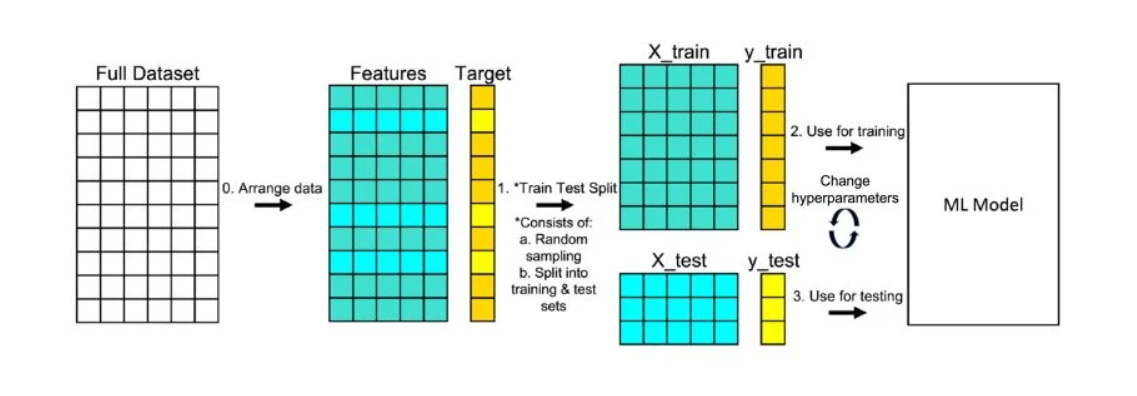

In [49]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.2, random_state=21
)

In [50]:
xtrain.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Origin_non-USA
57,1.365026,1.289670,1.185041,-0.423219,-0.016221,-0.356418,-0.265452,-0.304365,0.187910,-0.663618,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
31,-1.003095,-0.979424,-0.911397,0.113500,0.172352,-0.841022,-0.323043,2.054464,0.157535,-1.062184,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
62,0.606307,0.685966,0.729294,-0.781032,-0.959087,0.322027,1.116716,1.212025,-0.247462,0.716035,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
29,0.043016,-0.021825,-0.063707,-0.423219,-0.204794,0.806631,1.347077,0.875050,-0.713210,0.409445,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
51,1.985795,1.726835,1.449374,-0.781032,-0.581941,1.872759,1.270290,-1.146804,-0.996708,1.022624,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [51]:
ytrain.head()

57    2920
31    2530
62    3730
29    3490
51    4055
Name: Weight, dtype: int64

In [52]:
xtest.head()


,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Origin_non-USA
23,-1.003095,-0.854520,-0.701753,0.113500,-0.016221,-0.453339,-0.975733,-0.809828,0.532158,-0.816912,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
86,0.203957,0.332071,0.428500,-0.781032,-1.336233,-0.259498,-0.111878,-0.472853,0.370159,0.961306,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
91,0.537333,0.332071,0.145937,-0.244313,-0.204794,-0.356418,-0.572601,0.201098,-0.237337,-0.265051,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
21,1.422504,1.039862,0.692834,-0.423219,-0.581941,0.612789,0.060893,-0.809828,-1.108083,-0.203734,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17,0.100495,-0.073868,-0.209546,-0.959938,-0.581941,2.260442,0.502419,-1.820755,-1.988953,1.942392,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [53]:
ytest.head()

23    2670
86    3785
91    2985
21    3570
17    3910
Name: Weight, dtype: int64

In [54]:
xtrain.shape

(74, 64)

In [55]:
xtest.shape

(19, 64)

# Step 6 - Model building

In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xtrain, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
model.intercept_

np.float64(3523.0153789626697)

In [58]:

model.coef_

array([ 7.12212393e+03, -1.54355635e+04,  8.86749716e+03,  5.00676137e+00,
       -1.96248452e+02, -1.72195953e+02,  2.18990416e+02, -1.01240272e+02,
       -9.82918419e+01, -7.15652573e+01, -1.87890179e+01,  1.23960452e+02,
        1.40245110e+02,  1.46630116e+02, -2.79198764e+01, -4.96161337e+01,
        1.23076470e+02, -2.00775222e+01,  4.04828046e+02, -1.98024742e+02,
       -6.92192730e+01,  1.69794756e+01,  1.36424205e-12, -1.23142521e+01,
       -3.38587130e+01, -2.33198096e+01,  1.19980040e+00,  3.27801322e+02,
        5.42679913e+01,  1.21813043e+02, -1.28351110e+02,  1.24625901e+02,
       -2.15006137e+02, -9.76514709e+01, -7.09903501e+02,  4.29717366e+00,
       -3.43057874e+01, -4.40566494e+01, -1.64937780e+02,  4.79656697e+02,
        6.99422932e+01, -4.54364613e+02,  1.36087964e+01,  1.19319453e+01,
        2.84217094e-13, -8.92584268e+01,  1.12873235e+02,  5.13064123e+01,
       -2.60204740e+02, -2.25080841e+02,  3.34158069e+01, -2.17820097e+02,
        2.23174657e+02,  

In [59]:
xtrain.columns

Index(['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
       'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle',
       'Rear.seat.room', 'Luggage.room', 'Manufacturer_Audi',
       'Manufacturer_BMW', 'Manufacturer_Buick', 'Manufacturer_Cadillac',
       'Manufacturer_Chevrolet', 'Manufacturer_Chrylser',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Eagle',
       'Manufacturer_Ford', 'Manufacturer_Geo', 'Manufacturer_Honda',
       'Manufacturer_Hyundai', 'Manufacturer_Infiniti', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mazda',
       'Manufacturer_Mercedes-Benz', 'Manufacturer_Mercury',
       'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_Oldsmobile', 'Manufacturer_Plymouth',
       'Manufacturer_Pontiac', 'Manufacturer_Saab', 'Manufacturer_Saturn',
       'Manufacturer_Subaru', 'Manufacturer_Suzuki', 'Manufa

In [60]:
coefs = pd.Series(model.coef_, index=xtrain.columns).round(2)
coefs

Min.Price               7122.12
Price                 -15435.56
Max.Price               8867.50
MPG.city                   5.01
MPG.highway             -196.25
                         ...   
Cylinders_6             -504.39
Cylinders_8             -893.37
Cylinders_rotary       -1141.73
Man.trans.avail_Yes     -165.29
Origin_non-USA           131.00
Length: 64, dtype: float64

In [61]:
coefs.sort_values(ascending=False).head(5)

Max.Price                8867.50
Min.Price                7122.12
Manufacturer_Plymouth     479.66
Manufacturer_BMW          404.83
Manufacturer_Geo          327.80
dtype: float64


# Step 7 - Evaluate the model

In [62]:
# R2 score in train
r2_train = model.score(xtrain, ytrain)
print(r2_train)

0.9960137382218889


In [63]:
# R2 score in test
r2_test = model.score(xtest, ytest)
print(r2_test)

0.8703581386679466


In [64]:
# generalization error
gen_err = abs(r2_train - r2_test)
print(gen_err)

0.12565559955394223


In [65]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
)


def evaluate_model(model, x, y):
    # Predict the results
    ypred = model.predict(x)
    # Get the metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    # Print the results
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [66]:
print(f"Training Results : ")
evaluate_model(model, xtrain, ytrain)

Training Results : 
RMSE : 36.62
MAE : 24.38
MAPE : 0.84%
R2 : 99.60%


In [67]:
ypred_test = model.predict(xtest)
ypred_test[0:5]

array([2637.20122033, 3879.06895962, 3384.57157424, 3605.21495874,
       3705.20582955])

In [68]:
ytest.head()

23    2670
86    3785
91    2985
21    3570
17    3910
Name: Weight, dtype: int64

# R2 score > 80% for both train and test hence it is a good model and can be used for out of sample prediction
Step 8 - Out of Sample prediction


In [69]:
xnew = pd.read_csv("sample.csv", na_values=["", "NA"], keep_default_na=False)

In [70]:
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,15.0,6,190,106,65,37,31.0,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,15.2,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,16.5,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,12.4,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox


In [71]:
xnew.isna().sum()

Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               1
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        1
Luggage.room          1
Origin                0
Make                  0
dtype: int64

In [72]:
replacer(xnew)

Missing values replaced in dataframe


In [73]:
xnew.isna().sum()

Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Origin                0
Make                  0
dtype: int64

In [74]:
ohe

,categories,'auto'
,drop,'first'
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [75]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [76]:
xnew_cat = xnew[cat_cols]
xnew_cat

,Manufacturer,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin
0,Audi,Midsize,None,Front,6,Yes,non-USA
1,Pontiac,Compact,None,Front,4,Yes,USA
2,Chevrolet,Midsize,None,Front,4,No,USA
3,Mazda,Sporty,Driver only,Rear,rotary,Yes,non-USA
4,Volkswagen,Small,None,Front,4,Yes,non-USA


In [77]:
# transform above data
xnew_cat_pre = ohe.transform(xnew_cat)
xnew_cat_pre

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,Manufacturer_Ford,...,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Origin_non-USA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [78]:
# transform above data
xnew_cat_pre = ohe.transform(xnew_cat)
xnew_cat_pre

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,Manufacturer_Ford,...,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Origin_non-USA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [79]:
xnew_num = xnew[num_cols]
xnew_num

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,30.8,37.7,44.6,19,26,2.8,172,5500,2535,15.0,6,190,106,65,37,31.000,17.0
1,9.4,11.1,12.8,23,31,2.0,110,5200,2665,15.2,5,181,101,66,39,25.000,13.0
2,13.4,15.9,18.4,21,29,2.2,110,5200,2595,16.5,6,198,108,71,40,28.500,16.0
3,32.5,32.5,32.5,17,25,1.3,255,6500,2325,20.0,2,169,96,69,37,27.625,14.0
4,8.7,9.1,9.5,25,33,1.8,81,5500,2550,12.4,4,163,93,63,34,26.000,10.0


In [80]:
xnew_num_pre = scaler.transform(xnew_num)
xnew_num_pre

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,-0.510323,0.884457,0.467905,0.302785,-1.164350,-0.610436,1.078172,1.111472
1,-0.888138,-0.875337,-0.829362,0.113500,0.360925,-0.647181,-0.649388,-0.135877,0.673908,-0.449005,-0.083243,-0.151773,-0.434362,-0.898295,0.013416,-0.962320,-0.318186
2,-0.428309,-0.375720,-0.318925,-0.244313,-0.016221,-0.453339,-0.649388,-0.135877,0.532158,-0.050439,0.884457,1.018731,0.597644,0.431983,0.325342,0.227967,0.754057
3,1.767376,1.352122,0.966282,-0.959938,-0.770514,-1.325626,2.134145,2.054464,-0.014589,1.022624,-2.986345,-0.978011,-1.171509,-0.100128,-0.610436,-0.069605,0.039228
4,-0.968608,-1.083511,-1.130155,0.471312,0.738071,-0.841022,-1.206095,0.369586,0.441034,-1.307455,-1.050944,-1.391130,-1.613797,-1.696461,-1.546214,-0.622238,-1.390430


In [81]:
# combine both columns
xnew_pre = xnew_num_pre.join(xnew_cat_pre)
xnew_pre

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Origin_non-USA
0,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,-0.510323,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,-0.888138,-0.875337,-0.829362,0.113500,0.360925,-0.647181,-0.649388,-0.135877,0.673908,-0.449005,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.428309,-0.375720,-0.318925,-0.244313,-0.016221,-0.453339,-0.649388,-0.135877,0.532158,-0.050439,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.767376,1.352122,0.966282,-0.959938,-0.770514,-1.325626,2.134145,2.054464,-0.014589,1.022624,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,-0.968608,-1.083511,-1.130155,0.471312,0.738071,-0.841022,-1.206095,0.369586,0.441034,-1.307455,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [82]:
# predict the results
preds = model.predict(xnew_pre)
preds

array([3319.8064267 , 2665.76676634, 3197.55853826, 2903.28161217,
       2195.19178545])

In [83]:
xnew.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,None,Front,...,15.0,6,190,106,65,37,31.000,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,15.2,5,181,101,66,39,25.000,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,16.5,6,198,108,71,40,28.500,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,27.625,14.0,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,12.4,4,163,93,63,34,26.000,10.0,non-USA,Volkswagen Fox


In [84]:
xnew["Weight_pred"] = preds.round(2)

In [85]:
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make,Weight_pred
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,None,Front,...,6,190,106,65,37,31.000,17.0,non-USA,Audi 100,3319.81
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,5,181,101,66,39,25.000,13.0,USA,Pontiac Sunbird,2665.77
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,6,198,108,71,40,28.500,16.0,USA,Chevrolet Lumina,3197.56
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,2,169,96,69,37,27.625,14.0,non-USA,Mazda RX-7,2903.28
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,4,163,93,63,34,26.000,10.0,non-USA,Volkswagen Fox,2195.19


# Save above results to csv

In [86]:
xnew.to_csv("results.csv", index=False)

# Step 9 - Save the preprocessor objects and model

In [87]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [88]:
ohe

,categories,'auto'
,drop,'first'
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [89]:
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [90]:
# save scaler in file
import joblib

joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

In [91]:
# save scaler in file
import joblib
joblib.dump(scaler,"scaler.joblib")

['scaler.joblib']

In [92]:
# save ohe in file
joblib.dump(ohe, "ohe.joblib")

['ohe.joblib']

In [93]:
# save the model object
joblib.dump(model, "weight_model.joblib")

['weight_model.joblib']

# Load all above files using joblib

In [94]:
s = joblib.load("scaler.joblib")
s

,copy,True
,with_mean,True
,with_std,True


In [95]:
o = joblib.load("ohe.joblib")
o

,categories,'auto'
,drop,'first'
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [96]:
m = joblib.load("weight_model.joblib")
m

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [97]:
m.score(xtrain, ytrain)

0.9960137382218889

In [98]:
m.score(xtest, ytest)

0.8703581386679466